### Installations

In [ ]:
!pip install torch
!pip install sb3-contrib
!pip install stable_baselines
!pip install gym[box2d]==0.21.0
!pip install tqdm

### Imports

In [8]:
import torch as th
import gym

from sb3_contrib import TRPO
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
%matplotlib inline

print("Gym version: ",gym.__version__)
print("torch version: ",th.__version__)
if(th.cuda.is_available()): 
    device = torch.device('cuda:0') 
    th.cuda.empty_cache()
    print("Device set to : " + str(torch.cuda.get_device_name(device)))
else:
    print("Device set to : cpu")

Gym version:  0.21.0
torch version:  1.13.0
Device set to : cpu


### Test The Gym Environment

In [9]:
env = gym.make('LunarLanderContinuous-v2')
env.reset()
print("sample action: ", env.action_space.sample())
print("Obsevation space action: ", env.observation_space.shape)
print("sample observation: ", env.observation_space.sample())

sample action:  [-0.28576493 -0.3793123 ]
Obsevation space action:  (8,)
sample observation:  [-1.6546565   0.7256259   2.1247556  -1.0082954  -0.98624927 -1.4867046
 -1.0273969  -0.9586193 ]


### Train And Test the Agent

In [10]:
num_features = 128
num_layers = 3
# Custom actor (pi) and value function (vf) networks
# Custom MLP policy of three layers of size 128 each
policy_kwargs = dict(activation_fn=th.nn.ReLU,
                     net_arch=[dict(pi=[num_features]*num_layers, vf=[num_features]*num_layers)]) 

env = gym.make('LunarLanderContinuous-v2')
model = TRPO('MlpPolicy', env, policy_kwargs=policy_kwargs, gamma=0.99, target_kl=0.01, batch_size=64,verbose=1)

episodes = 10

reward_per_episode = []


for episode in trange(episodes):
    model = model.learn(total_timesteps=2048, log_interval=4)
    state = env.reset()
    total_reward, total_step = 0, 0
    while True:
        action, _state = model.predict(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        total_reward += reward
        total_step += 1
        if done:
            env.reset()
            reward_per_episode.append(total_reward)
            break

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.88s/it]


### Results

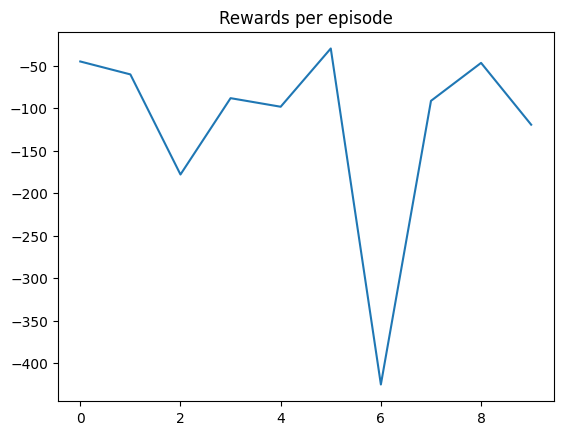

In [11]:
plt.plot(reward_per_episode)
plt.title("Rewards per episode")
plt.show()